# Working with Data

In [1]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
point = 52
bucket_size = 20
a = point/bucket_size
b = math.floor(a)
c = bucket_size * b
print(a, b, c)

2.6 2 40


In [13]:
def bucketize(point: float, bucket_size: float) -> float:
    '''Floor the point to the next lower multiple of bucket_size'''
    return bucket_size * math.floor(point/bucket_size)

In [22]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    return plt

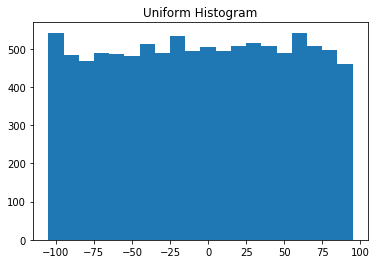

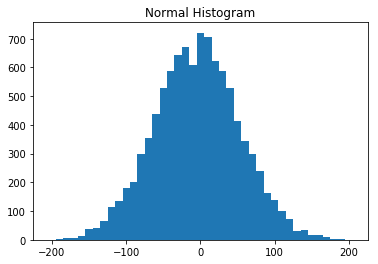

In [25]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

plt = plot_histogram(uniform, 10, "Uniform Histogram")
plt.savefig('images/working_histogram_uniform.png')
plt.show();

plt = plot_histogram(normal, 10, "Normal Histogram")
plt.savefig('images/working_histogram_normal.png')
plt.savefig('images/working_histogram_uniform.png')
plt.show();

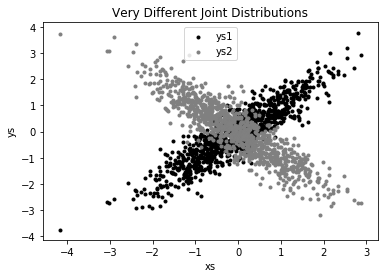

In [26]:
import random
from scratch.probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.savefig('images/working_scatter.png')
plt.show();